<a href="https://colab.research.google.com/github/aditipriya25/Traffic-prediction/blob/main/Traffic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data = pd.read_csv('/content/traffic prediction.csv')

In [4]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [5]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [6]:
data.tail()

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [7]:
data.shape

(48120, 4)

In [8]:
data.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [9]:
data.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
data.duplicated().sum()

0

In [12]:
data.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [13]:

cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

num_cols = data.select_dtypes(exclude='object').columns
print(num_cols)

Index(['DateTime'], dtype='object')
Index(['Junction', 'Vehicles', 'ID'], dtype='object')


In [14]:
data.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [15]:
data.describe(include='object')

,DateTime
count,48120
unique,14592
top,2017-06-30 23:00:00
freq,4


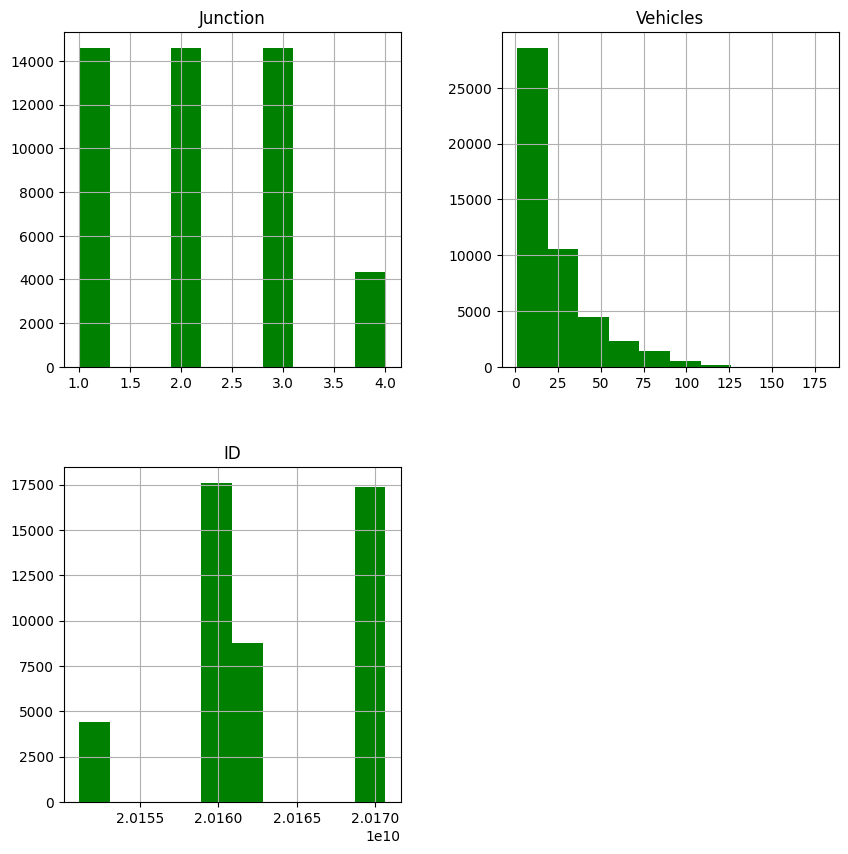

In [16]:
data.hist(figsize=(10,10),color='green')
plt.show()

<ipython-input-17-93d1111564e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature , data=data , palette='Wistia')


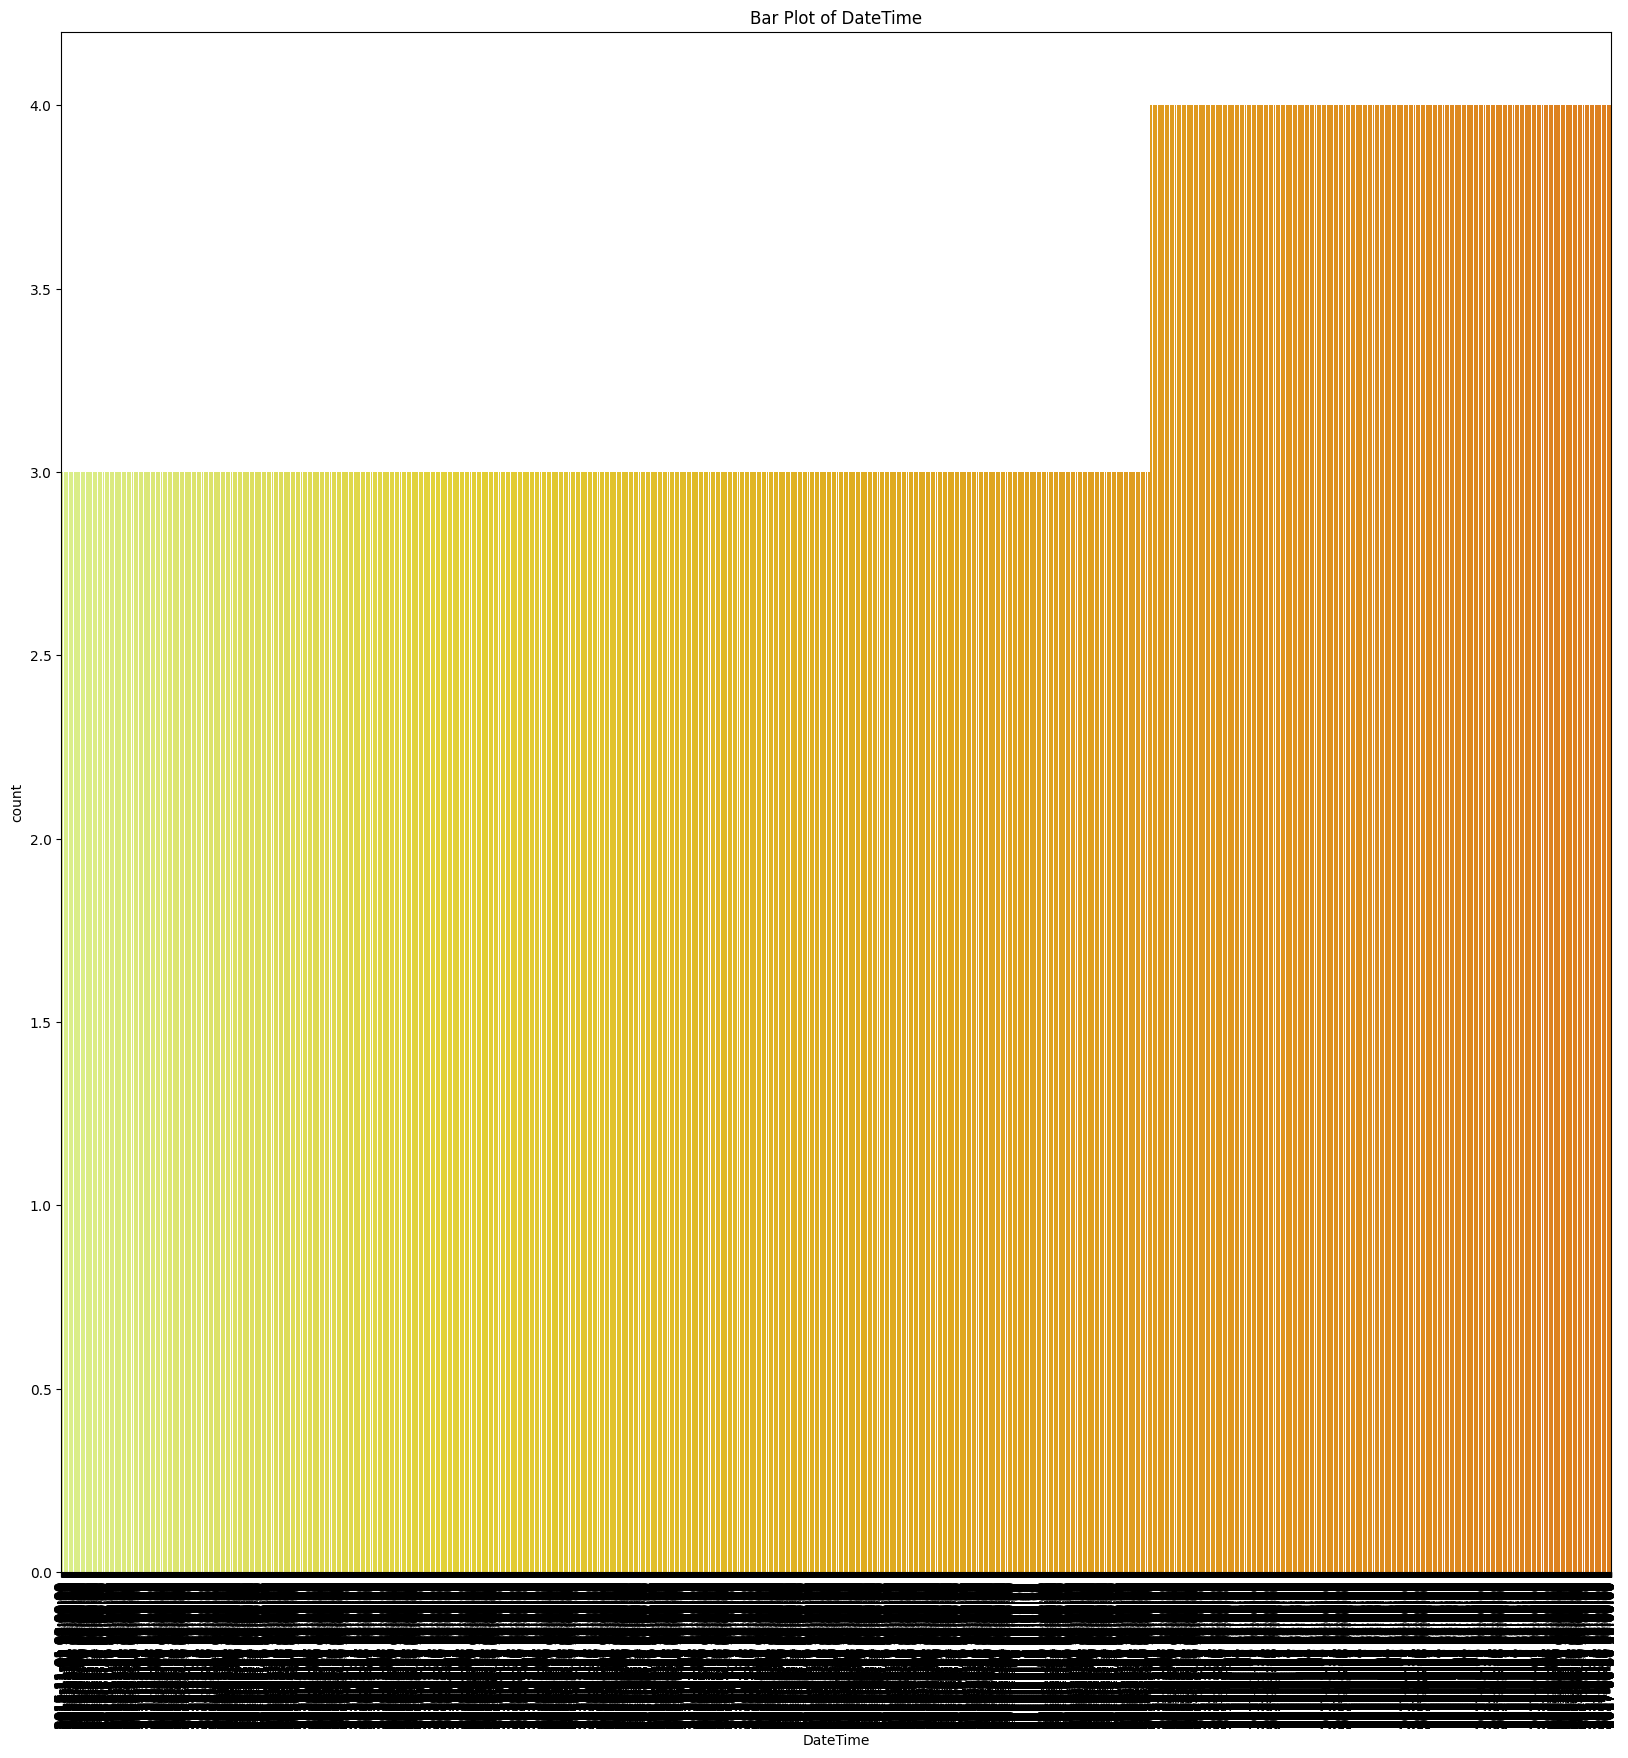

In [17]:

for feature in cat_cols:
  plt.figure(figsize=(20,20))
  sns.countplot(x=feature , data=data , palette='Wistia')
  plt.title(f'Bar Plot of {feature}')
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.xticks(rotation=90)
  plt.show()

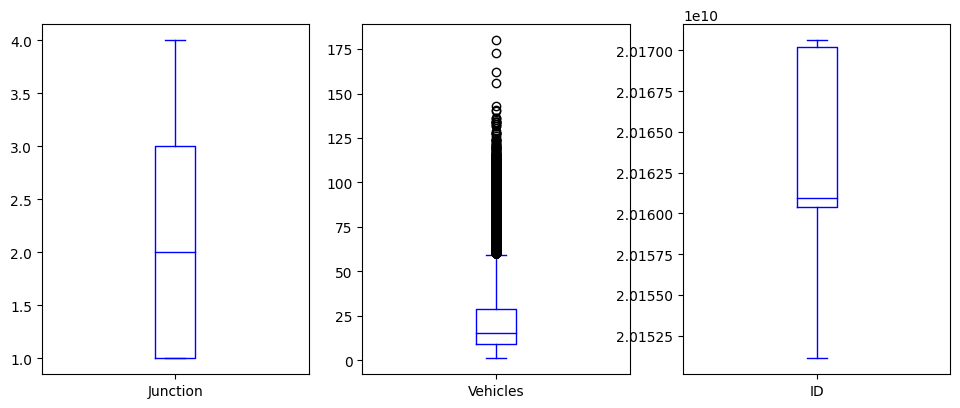

In [18]:

data.plot(kind='box', subplots=True , layout=(2,5) , figsize=(20,10), color='blue')
plt.show()

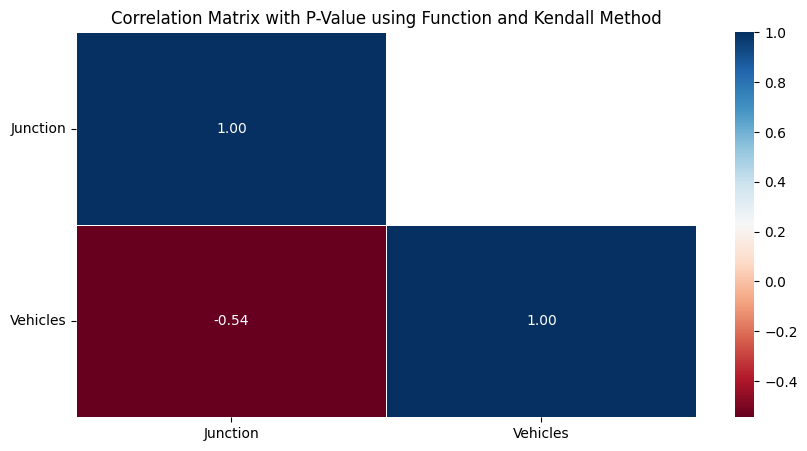

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from scipy.stats import pearsonr, spearmanr, kendalltau

# Load the dataset
data = pd.read_csv('/content/traffic prediction.csv')

# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract the features and labels
X = data.drop(['ID'], axis=1).values
y = data['ID'].values

# Calculate the correlation matrix using Kendall's rank correlation coefficient method
corr = data.drop(['ID', 'DateTime'], axis=1).corr(method='kendall')

# Create a custom mask to remove the upper triangle of the correlation matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set the diagonal elements to False
np.fill_diagonal(mask, False)

# Generate a heatmap using the Seaborn library
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Correlation Matrix with P-Value using Function and Kendall Method')
heatmap = sns.heatmap(corr, annot=True, annot_kws={"fontsize": 10}, fmt='.2f', linewidths=0.5, cmap='RdBu', mask=mask, ax=ax)

# Customize y-axis labels
y_labels = [textwrap.fill(label.get_text(), 13) for label in ax.get_yticklabels()]
ax.set_yticklabels(y_labels, rotation=0, ha="right")
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_encoded = data.apply(lb.fit_transform)
data_encoded

,DateTime,Junction,Vehicles,ID
0,0,0,14,0
1,1,0,12,3
2,2,0,9,6
3,3,0,6,9
4,4,0,8,12
...,...,...,...,...
48115,14587,3,10,48103
48116,14588,3,29,48107
48117,14589,3,15,48111
48118,14590,3,21,48115


In [23]:
x = data_encoded.drop('Junction',axis=1)
y = data_encoded['Junction']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(48120, 3)
(48120,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [25]:
x = data_encoded.drop('Vehicles',axis=1)
y = data_encoded['Vehicles']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(48120, 3)
(48120,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(36090, 3)
(12030, 3)
(36090,)
(12030,)


In [28]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred)
  print('Accuracy Score',acc)
  cm = confusion_matrix(y_test,y_pred)
  print('Comfusion Matrix',cm)
  print('Classification Report',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [30]:
mscore(dt)

Training Score 0.07869215849265725
Testing Score 0.06816292601828762


In [31]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[ 7 54 11 ... 36 11 23]


In [32]:
eval_model(y_test,ypred_dt)

Accuracy Score 0.06816292601828762
Comfusion Matrix [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00       108
           2       0.00      0.00      0.00       194
           3       0.14      0.05      0.07       311
           4       0.14      0.19      0.16       438
           5       0.13      0.24      0.17       537
           6       0.15      0.03      0.05       565
           7       0.09      0.44      0.16       613
           8       0.05      0.07      0.06       573
           9       0.00      0.00      0.00       590
          10       0.00      0.00      0.00       498
          11       0.06      0.26      0.10       458
          12       0.00      0.00      0.00       428
          13       0.03      0.01      0.01      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.tree import plot_tree


cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['DateTime', 'Junction', 'ID'], dtype='object')
['no', 'yes']


In [41]:
print(data.head())
print(data.shape)

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
(48120, 4)


In [42]:
print(X.shape)
print(X[:5])

(48120, 2)
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [43]:
print(y.shape)
print(y[:5])


(48120,)
[20151101001 20151101011 20151101021 20151101031 20151101041]


In [44]:
print(data.columns)

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [46]:
# Convert categorical variables to numerical
X[:, 0] = np.where(X[:, 0] == 'no', 0, 1)
X[:, 1] = np.where(X[:, 1] == 'no', 0, 1)

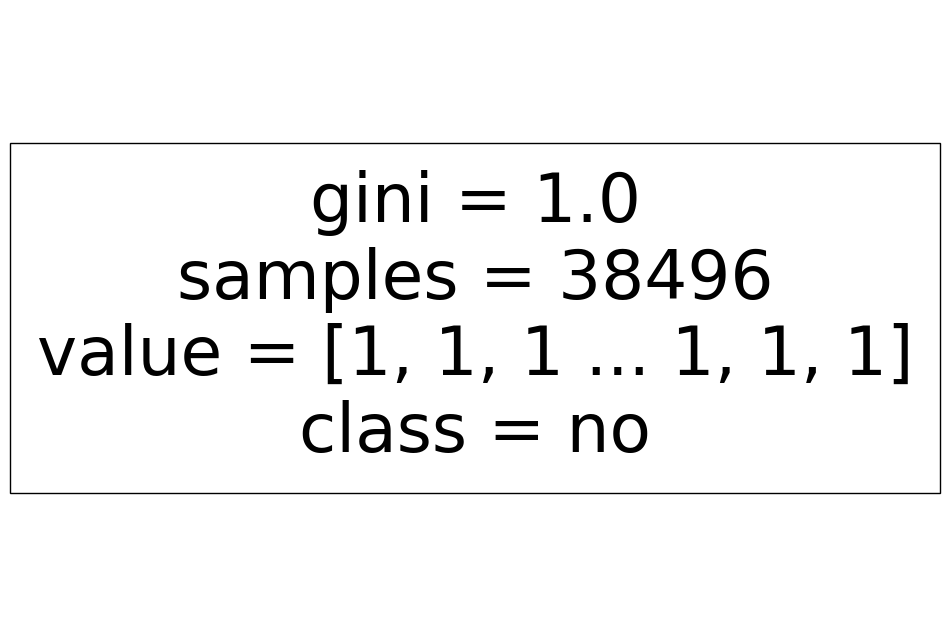

In [52]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# Plot the decision tree
fig = plt.figure(figsize=(12,8))
_ = plot_tree(clf, feature_names=fn, class_names=['no', 'yes'], filled=True)
plt.show()

Accuracy: 0.6186616791354946
              precision    recall  f1-score   support

           1       0.78      0.89      0.84      2918
           2       0.50      0.89      0.64      2918
           3       0.00      0.00      0.00      2919
           4       0.71      0.86      0.78       869

    accuracy                           0.62      9624
   macro avg       0.50      0.66      0.56      9624
weighted avg       0.45      0.62      0.52      9624

[[2603  315    0    0]
 [ 253 2606    0   59]
 [ 460 2216    0  243]
 [   0  124    0  745]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


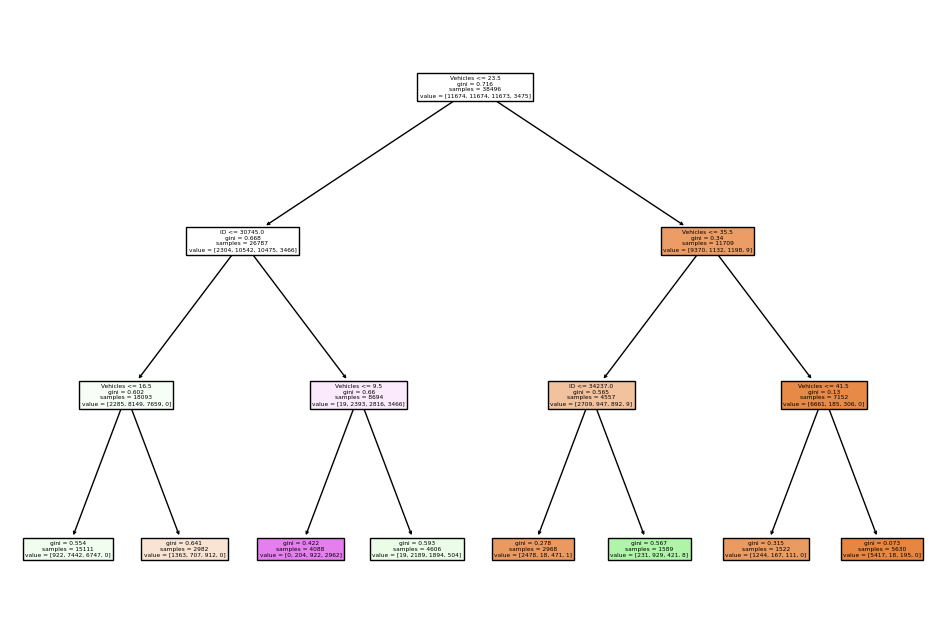

In [65]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/traffic prediction.csv')

# Ensure correct column names for the target and features
X = data.drop(['Junction'], axis=1)
y = data['Junction']

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
for col_index, col_name in enumerate(X.columns):
    X[col_name] = le.fit_transform(X[col_name])

# Split the dataset into training and testing sets using StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Define the decision tree classifier with max_depth=3
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Get the feature names
fn = X_train.columns



# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=fn,  filled=True)
plt.show()
